In [1]:
import simspace as ss
import numpy as np
import pandas as pd

## Quick Demo: reference-based spatial omics simulation

In [2]:
# Step 1: Load the reference dataset. We here provide a sample dataset from Xenium human breast tumor dataset.
ref_meta = pd.read_csv('../data/reference_metadata.csv', index_col=0)
ref_omics = pd.read_csv('../data/reference_count.csv', index_col=0)

In [3]:
ref_meta.head(3)

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,total_counts,cell_area,nucleus_area,Cluster
0,4303,1654.367181,2017.908301,416,0,0,416,490.216250,82.184375,Stromal
1,4304,1669.259509,2026.475952,560,1,0,561,348.741719,110.226406,Invasive_Tumor
2,4305,1660.068158,2040.800818,315,0,0,315,256.668125,65.702344,Invasive_Tumor


In [10]:
ref_omics.head(3)

,4303,4304,4305,4306,4307,4308,4309,4310,4311,4312,...,76380,76381,76382,76383,76384,76385,76386,76387,76388,76389
ABCC11,0,16,4,5,2,0,1,0,0,0,...,0,1,2,5,3,7,3,1,1,5
ACTA2,13,2,1,0,2,0,1,3,4,13,...,5,0,0,1,1,0,2,2,0,0
ACTG2,1,1,1,0,2,2,3,6,2,4,...,1,2,0,4,1,2,3,1,1,4


In [14]:
# Step 2: Fit SimSpace spatial parameters from the reference.
# This step uses the reference metadata and omics data to fit the spatial parameters for the simulation.
# One can do this by using the `ss.fit()` method and some preprocessing, which is shown in details in spaital_fitting.ipynb.
# Here we provide a pre-fitted parameters for the Xenium human breast tumor dataset.
params = ss.util.load_params('../data/fitted_params.json')

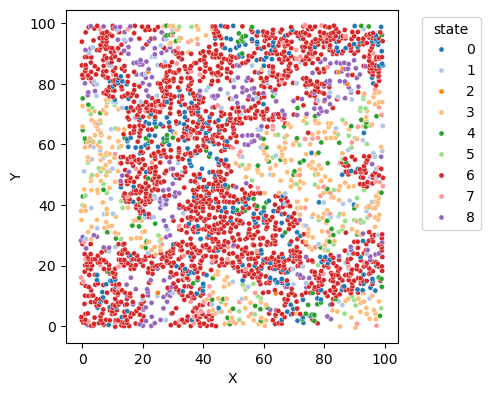

In [ ]:
# Step 3: Simulate the spatial omics data using the fitted parameters.
# This step uses the fitted parameters to simulate the spatial omics data, just as the reference-free simulation.
sim = ss.util.sim_from_params(
    parameters=params,
    shape=(100, 100),
    custom_neighbor=ss.spatial.generate_offsets(3, method='manhattan'),
    seed=0,
)
# This results is the simulated spatial omics data shown in Fig. 3, with x and y axis switched.
sim.plot(figsize=(5, 5), dpi=100, size=14)

In [18]:
# Step 4 (Optional): Simulate omics data based on the spatial simulation.
# The omics profile can also be fitted from the reference dataset if the reference is available.
# Here we use the `fit_scdesign` method to fit the spatial simulation with the reference dataset, 
# which requires the R package 'scDesign3' to be installed. One can find more details in README about the installation.
# The following process may take a while, depending on the size of the reference dataset. 
# In this example, it takes about 2 minutes to get the simulation done.
sim.fit_scdesign(
    '../data/reference_count.csv',
    '../data/reference_metadata.csv',
    'Cluster',      # Column in metadata that contains the cell type information
    'x_centroid',   # Column in metadata that contains the x coordinate of the cell centroid
    'y_centroid',   # Column in metadata that contains the y coordinate of the cell centroid
    seed=0,
)

Temporary directory created.
scDesgin fit complete.


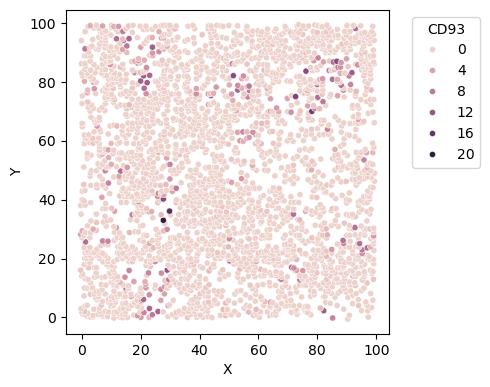

In [ ]:
# Example of plotting a specific gene, e.g., 'CD93'.
sim.plot('CD93', figsize=(5,5), dpi=100)